In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## Load datasets and splitting

In [13]:
# Load iris dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 1. Classification

In [14]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation: Confusion Matrix and Classification Report
print("Logistic Regression - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nLogistic Regression - Classification Report")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression - Confusion Matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
# Train k-NN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation: Confusion Matrix and Classification Report
print("k-NN - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))
print("\nk-NN - Classification Report")
print(classification_report(y_test, y_pred_knn))


k-NN - Confusion Matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

k-NN - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [16]:
# Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation: Confusion Matrix and Classification Report
print("Decision Tree - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt))
print("\nDecision Tree - Classification Report")
print(classification_report(y_test, y_pred_dt))


Decision Tree - Confusion Matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation: Confusion Matrix and Classification Report
print("Random Forest - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))


Random Forest - Confusion Matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [18]:
# Train SVM model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation: Confusion Matrix and Classification Report
print("SVM - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))
print("\nSVM - Classification Report")
print(classification_report(y_test, y_pred_svm))


SVM - Confusion Matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

SVM - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 2. Confusion Matrix

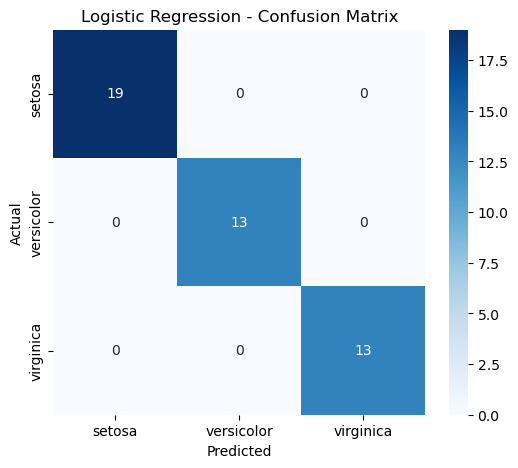

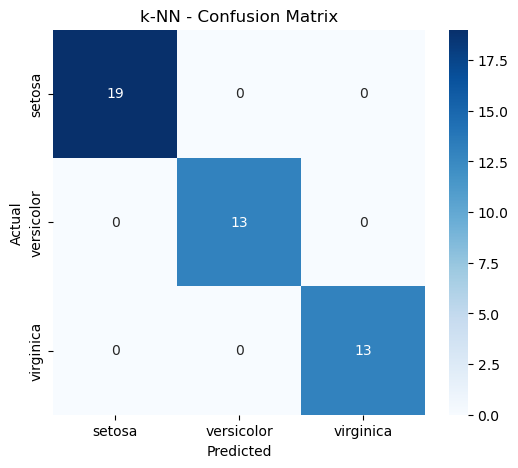

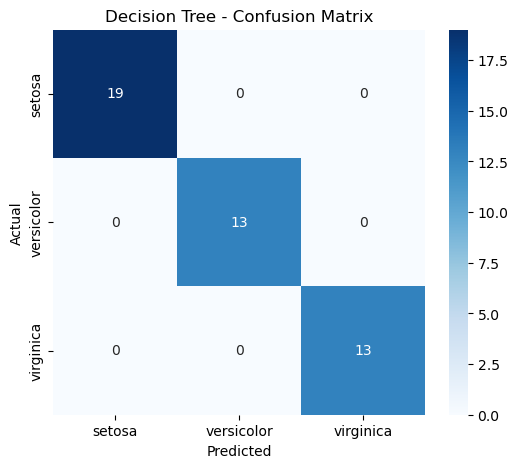

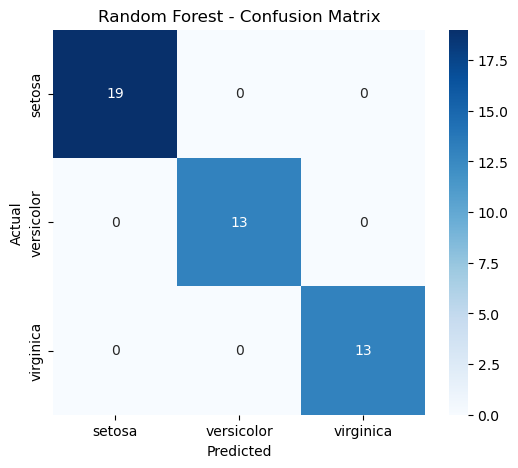

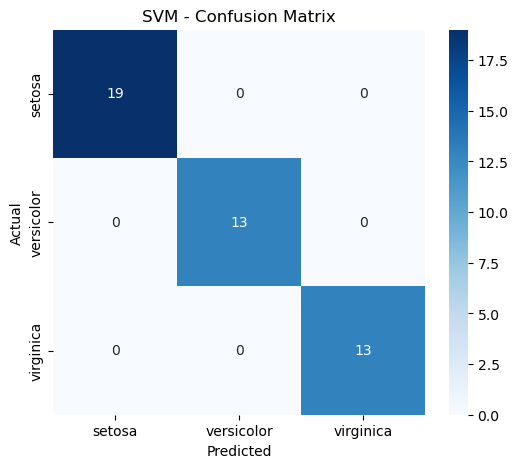

In [19]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_knn, "k-NN")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")


## 3. Probability histogram

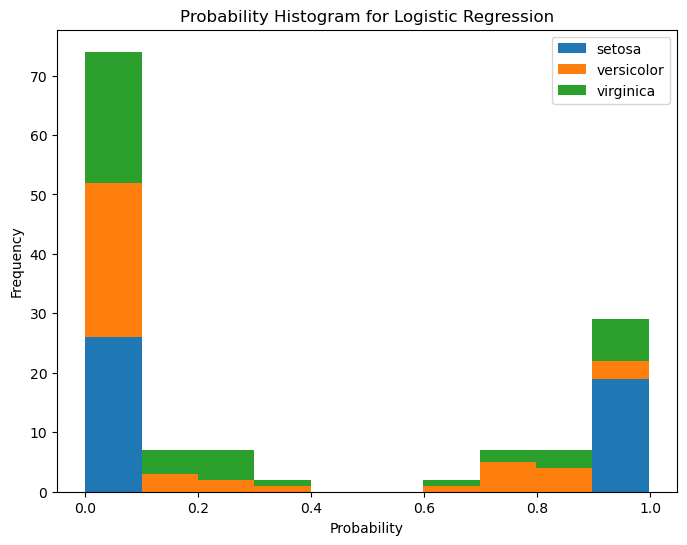

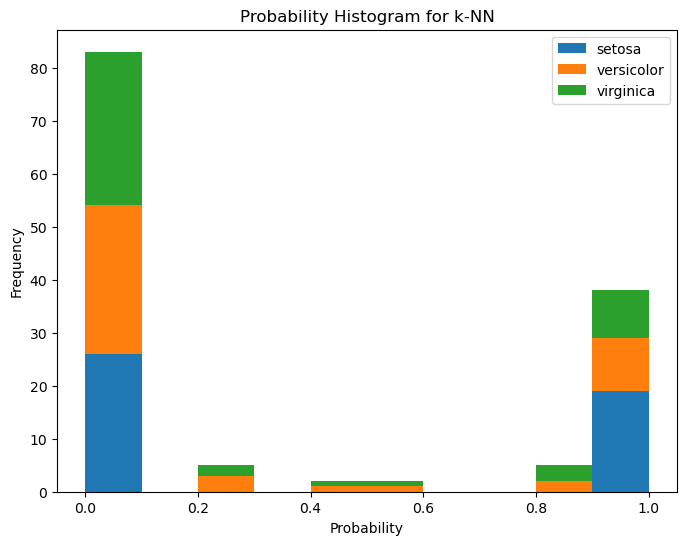

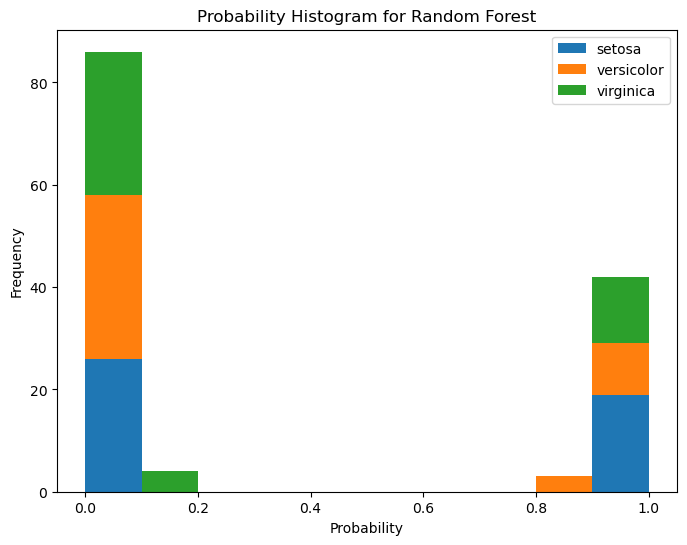

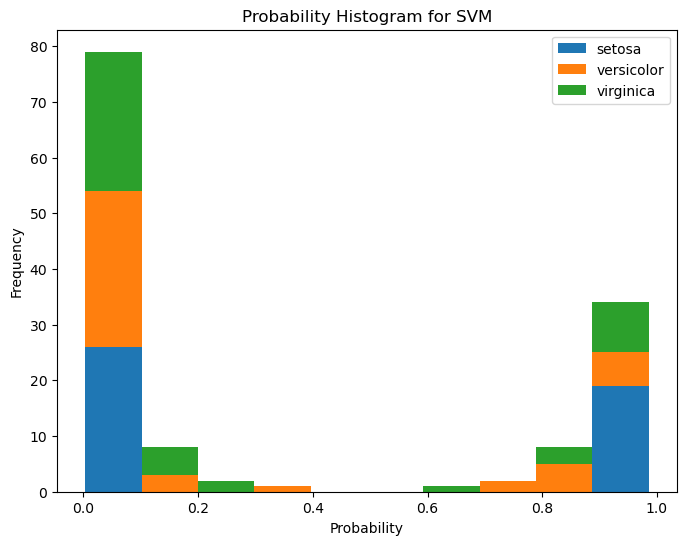

In [20]:
def plot_probability_histogram(model, X_test, model_name):
    # Get probabilities
    if hasattr(model, "predict_proba"):
        prob = model.predict_proba(X_test)
        plt.figure(figsize=(8, 6))
        plt.hist(prob, bins=10, stacked=True, label=data.target_names)
        plt.title(f"Probability Histogram for {model_name}")
        plt.xlabel("Probability")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

# Plot probability histogram for each model
plot_probability_histogram(log_reg, X_test, "Logistic Regression")
plot_probability_histogram(knn, X_test, "k-NN")
plot_probability_histogram(rf, X_test, "Random Forest")
plot_probability_histogram(svm, X_test, "SVM")
